# Week 5
# Simple Linear Regression and the Normal Equation (Chapter 4)

So far we have treated machine learning models and their training algorithms mostly like black boxes. Starting from Chapter 4, we will look into the mechanism of several popular machine learning models, analyze them mathematically and learn how to implement the methods from scratch. Let's start with the linear regression model.

## I. Simple Linear regression: Sales Prediction

To put things into context, let's look at a dataset that contains the sales revenue and the advertising budgets of a company in 200 different markets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv"
advertising = pd.read_csv(url, index_col=0)
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017DAA136BC8>,
      dtype=object)

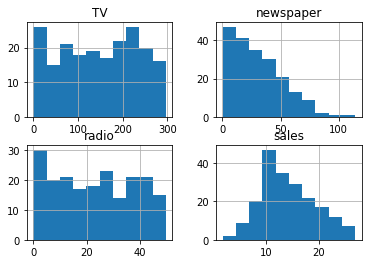

In [5]:
advertising.hist()

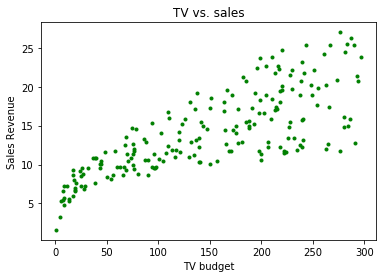

In [6]:
# plot TV vs. sales
plt.plot(advertising['TV'], advertising['sales'], 'g.')
plt.title("TV vs. sales")
plt.xlabel("TV budget")
plt.ylabel("Sales Revenue")
plt.savefig("TVvsSales.png")
plt.show() # this is needed in other Python environments

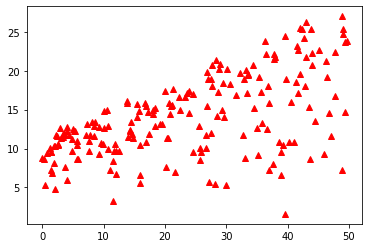

In [7]:
# plot radio vs. sales
plt.plot(advertising['radio'], advertising['sales'], 'r^')

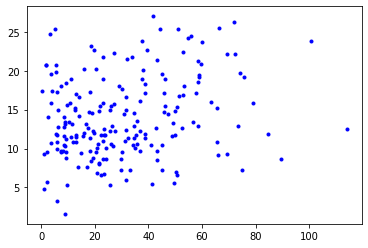

In [8]:
# plot newspaper vs. sales
plt.plot(advertising['newspaper'], advertising['sales'], 'b.')

### Correlation Coefficient
The **correlation coefficient** is a numerical measurement of linear correlation between two variables.
- The value of correlation coefficient always lies in [-1, 1].
- If there is a strong positive correlation, then the coefficient is close to 1.
- If there is a strong negative correlation, then the coefficient is close to -1.
- If there is a very weak correlation, then the coefficient is close to 0.
- However, a near-zero coeffient may be caused by non-linear correlations.
![](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)

In [13]:
# Calculate the correlation coefficients of each input feature and sales
np.corrcoef(advertising['TV'], advertising['sales'])[0, 1]

0.7822244248616061

In [10]:
np.corrcoef(advertising['radio'], advertising['sales'])[0, 1]

0.5762225745710551

In [11]:
np.corrcoef(advertising['newspaper'], advertising['sales'])[0, 1]

0.22829902637616528

For simplicity, we will only use `TV` as a predictor of `sales`.

In [14]:
data = advertising[['TV', 'sales']]
data.head()

,TV,sales
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3
4,151.5,18.5
5,180.8,12.9


### Slicing a data frame
- Use df[cols] to select a subset of columns
- Use df.loc[rows] to select a subset of rows
- The result **is a new data frame**

In [ ]:
# Change the first value of data from 230.1 to 230.2
data.loc[1, 'TV'] = 230.2
data.head()

In [ ]:
# What is the first value in advertising? 230.1? 230.2?
advertising.head()

In [ ]:
# Change the second value in adverting to 44.6
advertising.loc[2, 'TV'] = 44.6
advertising.head()

In [ ]:
data2 = advertising.loc[:, ['TV', 'sales']]
data2.loc[1, 'TV'] = 123
data2.head()
# advertising.head()

In [ ]:
# Change things back
data.loc[1, 'TV'] = 230.1
advertising.loc[2, 'TV'] == 44.5
data.head()

## Simple Linear Regression: Model Representation

In order to describe the model mathematically, we need to introduce a few notations:
- The input feature `TV` is represented as variable $X$.
- The output/response feature `sales` is represented as variable $Y$.
- Each instance of data is represented as $(x_i, y_i)$, where $i$ is the row index, $x_i$ is the value corresponding to $X$, and $y_i$ is the value corresponding to $Y$. For example, $(x_1, y_1) = (230.1, 22.1)$.

The **simple linear regression** model assumes that the relationship between $X$ and $Y$ is
$$Y \approx f(X) = \beta_0 + \beta_1 X.$$

- $\beta_0$ and $\beta_1$ are called **model parameters**. For simple linear regression, the relationship is characterized as a straight line with slope $\beta_1$ and y-intercept $\beta_0$.
- For a given line, we need a **cost function** (in some occasions also called **loss function**) that measures how well a given line fits the data.
- We also need a **training algorithm** that finds values of parameters so that the line fits the data well (usually "fitting the data well" means "minimizing the cost").


## Simple Linear Regression: Cost Function
A common choice of cost function is the **mean squared error (MSE) function**. It is defined as
$$\begin{align}
MSE(\beta_0, \beta_1) =& 
\frac{1}{N}\sum_{i=1}^N (y_i - f(x_i))^2 \\
=& \frac{1}{N}\sum_{i=1}^N\big(y_i - \beta_0 - \beta_1x_i\big)^2.
\end{align}$$

To better understand the MSE function, let's calculate the value $MSE(5, 0.1)$.

In [15]:
# Calcul2 = te (y_1 - f(x_1))^2 with beta0 = 5 and beta1 = 0.1.
x1 = data.loc[1, 'TV'] # 230.1
y1 = data.loc[1, 'sales'] #22.1
print("x1, y1:", x1, y1)
# Calculate model prediction: f(x) = beta0 + beta1 * x
beta0 = 5
beta1 = 0.1
fx1 = beta0 + beta1 * x1 # 5 + 0.1 * 230.1
print("Prediction:", fx1)
# Calculate the squared error (y - f(x))^2
squared_error = (y1 - fx1) ** 2
print("Squared error:", squared_error)

x1, y1: 230.1 22.1
Prediction: 28.01
Squared error: 34.9281


In [16]:
def get_squared_error(beta0, beta1, xi, yi):
    predict_fx = beta0 + beta1 * xi
    squared_error = (yi - predict_fx) ** 2

    return squared_error

In [17]:
get_squared_error(5, 0.1, 230.1, 22.1)

34.9281

In [18]:
# Create a list that contains value of (y_1 - f(x_1))^2 for i=1,...,200.
list_errors = []
for ind in data.index:
    xi = data.loc[ind, 'TV']
    yi = data.loc[ind, 'sales']
    squared_error = get_squared_error(5, 0.1, xi, yi)
    list_errors.append(squared_error)
print(len(list_errors))

200


In [19]:
list_errors2 = [get_squared_error(5,
                                  0.1,
                                  data.loc[ind, "TV"],
                                  data.loc[ind, 'sales']) \
                for ind in data.index]
print(list_errors2)

[34.9281, 0.9025000000000021, 6.656400000000005, 2.7224999999999953, 103.63240000000003, 1.7689000000000001, 1.1025000000000016, 14.59240000000003, 1.123600000000001, 206.78440000000012, 9.060099999999998, 82.26490000000001, 3.3123999999999945, 25.50250000000001, 41.088100000000004, 4.579600000000018, 0.5183999999999984, 76.38760000000003, 0.38440000000000124, 26.316900000000043, 78.14560000000006, 263.73760000000004, 0.518400000000001, 152.02890000000005, 2.3409000000000035, 372.10409999999996, 18.404099999999993, 171.87210000000005, 120.56040000000009, 2.433599999999996, 166.15210000000002, 19.27209999999999, 26.214400000000012, 200.5056000000001, 25.704900000000002, 452.4129, 39.56409999999999, 4.972899999999994, 0.6240999999999987, 39.69000000000001, 74.82249999999998, 31.359999999999975, 186.5956, 163.58410000000003, 0.9801000000000004, 57.91210000000002, 11.356900000000007, 33.52410000000003, 166.92639999999994, 3.9601000000000077, 184.4164000000001, 18.835600000000014, 16.321599

In [20]:
# Calculate MSE(5, 0.1)
MSE = np.mean(list_errors)
print("MSE:", MSE)

MSE: 62.98132950000001


In [21]:
# Write a function MSE(beta0, beta1, data) that returns the value of MSE with given beta0 and beta1.
def get_MSE(beta0, beta1, data):
    # Calculate the list of squared errors
    list_errors = []
    for ind in data.index:
        xi = data.loc[ind, 'TV']
        yi = data.loc[ind, 'sales']
        squared_error = get_squared_error(beta0, beta1, xi, yi)
        list_errors.append(squared_error)
    # Calculate the average
    MSE = np.mean(list_errors)
    return MSE

In [22]:
# Calculate MSE(7, 0.05) using MSE().
get_MSE(7, 0.05, data)

10.665809875

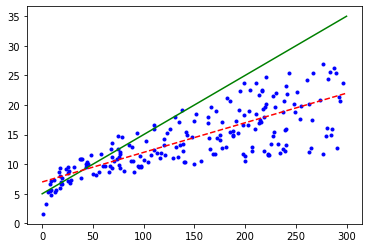

In [23]:
# Plot the data as a scatter plot.
plt.plot(data['TV'], data['sales'], 'b.')
# Plot the line y = 5 + 0.1x.
x_coordinates = np.array([0, 300])
y_coordinates = x_coordinates * 0.1 + 5
plt.plot(x_coordinates, y_coordinates, 'g-')
# Plot the line y = 7 + 0.05x.
y_coordinates = x_coordinates * 0.05 + 7
plt.plot(x_coordinates, y_coordinates, 'r--')

**Discussion**: 
- Which line fits the data better? 
- Which line has smaller MSE value?
- What is the geometric meaning of the MSE function?

Each individual error is the vertical distance between a data point and the regression line. The MSE measure the average squared vertical distance.

# Simple Linear Regression: Training Algorithm
To find the value of $\beta_0, \beta_1$ that minimizes the MSE cost function, there is a formula called **normal equation** that gives the result directly:

$$\begin{pmatrix} \beta_0 \\ \beta_1 \end{pmatrix} = (\textbf{X}^T\cdot\textbf{X})^{-1}\cdot\textbf{X}^T\cdot\textbf{y}.$$

- $\textbf{X}$ is the matrix formed as 
$$\textbf{X} = \begin{pmatrix} 
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{pmatrix}.$$
- $\textbf{X}$ is the **matrix transpose** of $\textbf{X}$.
- $\cdot$ is **matrix multiplication**.
- $^{-1}$ is **matrix inverse**.
- $\textbf{y}$ is the vector of target values
$$\textbf{y} = \begin{pmatrix} 
y_1 \\
y_2 \\
\vdots \\
y_N \\
\end{pmatrix}.$$

Let's apply the normal equation and find the best parameter values.

In [24]:
np.ones([5, 1])

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [25]:
# Construct X and y as numpy arrays
X = np.hstack([np.ones([len(data), 1]), data[['TV']].values])
# print(X)
y = data[['sales']].values
# print(y)

beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
# beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(beta)

[[7.03259355]
 [0.04753664]]


In [26]:
get_MSE(7.03, 0.047, data)

10.52140766755

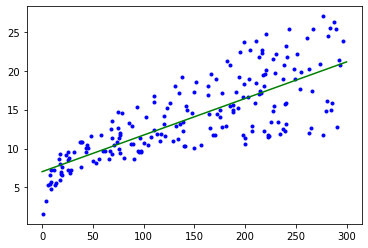

In [31]:
# Plot the data points and the optimal regression line.
plt.plot(data['TV'], data['sales'], 'b.')
x_coordinates = np.array([0,300])
y_coordinates = x_coordinates * 0.047 + 7.03
plt.plot(x_coordinates, y_coordinates, 'g-')

In [32]:
# Find the results using LinearRegression class from sklearn.linear_model
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(data[['TV']], data[['sales']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# The coef_ and intercept_ attributes contain parameter values
print(model_lr.coef_)
print(model_lr.intercept_)

[[0.04753664]]
[7.03259355]


**Discussion**:
- How can we interpret the value of $\beta_1$?
- How can we interpret the value of $\beta_0$?

# Homework
This homework assignment aims to build a simple linear regression model using the `radio` feature.
1. Apply the normal equation to calculate parameter values for the best fit.
2. Display the regression line with the training data points.
3. Use `sklearn` to build the same model. Verify that the parameters values are the same as those from the normal equation.
4. (master students only) Read [this article](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score) to learn the concept of R^2 statistic. Calculate the R^2 statistic of the above model.
5. (master students only) Train a linear model using `sklearn` with parameter `fit_intercept` set to False. Compare the R^2 of this model and the previous model.